# Machine Learning: Assignment 5 
## SVM plus Other Classification Method (max. 10p)

The dataset for the exercise is "Date Fruit Datasets" file you can find from [Date_Fruit_Datasets.xlsx](data/Date_Fruit_Datasets.xlsx), which contains 898 rows and 34 columns of data about dates and a column telling the species of dates. 

There are **seven** (**7**) date fruit species in the dataset, so this is kind of **multi-class classification problem**.

More information about the data and related research: [https://www.muratkoklu.com/datasets/](https://www.muratkoklu.com/datasets/).


In [118]:
# Write Your information in here
student_name = 'Janne Arkko'
student_id = 'AB3817'

## Assignment 5.1
### Topic: Data Preprocessing (2 points)
The dataset has a class variable (target) in the last column.

Let's do the following preprocessing steps with the dataset:

1. Load the data into the DataFrame.
2. Name the columns of the DataFrame according to the material.
3. Preprocess the material
   * Optimize the data input to the machine learning model
   * you can remove "unnecessary features" at your discretion
   * handling of abnormal (outliers) or empty data values
  * Remember that all categories should be numeric
4. Scale column values by normalizing.

In [119]:
# TODO: Write your code in this cell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

file_path = "D:/JAMK/Machine Learning/ml-assignments/assignment_5/data/Date_Fruit_Datasets.xlsx"
df_original = pd.read_excel(file_path, engine='openpyxl')

nan_columns = df_original.isna().any() # no NaN values present in the dataset
#print(nan_columns)

correlation_matrix = df_original.corr().abs()

# Find the highly correlated features
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
threshold = 0.6 # I tested this value alot and the best accuracy below came with 0.6 as threshold correlacy.
high_correlation_features = set() # make a set() to ensure no duplicates

# Find and store highly correlated pairs
for column in upper_tri.columns:
    high_corr_cols = upper_tri[column][upper_tri[column] > threshold].index.tolist()
    for row in high_corr_cols:
        # Add both features of the pair to the set
        high_correlation_features.update([row, column])

high_corr_df = df_original[high_correlation_features] # new df for highly correlated features, 4 columns in total removed from dataset.

# find outliers using PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(high_corr_df)
pca = PCA(n_components=2)
pca_df = pd.DataFrame(data=(pca.fit_transform(scaled_data)), columns=['PC1', 'PC2'])

outliers = pca_df[(pca_df > 10).any(axis=1)]
#print(outliers) # prints indices [615, 737]
outlier_i = [615,737]
outliers_in_original_data = high_corr_df.iloc[outlier_i]
#print(outliers_in_original_data) # only two rows out of over 800 rows, so I decide to remove those rows.

high_corr_df_cleaned = high_corr_df.drop(index=outlier_i) # drop outlier indexes


# scale and fit PCA again for cleaned data to see effect
scaler2 = StandardScaler() 
scaled_data2 = scaler2.fit_transform(high_corr_df_cleaned)
pca2 = PCA(n_components=2)
pca_df2 = pd.DataFrame(data=(pca2.fit_transform(scaled_data2)), columns=['PC1', 'PC2'])

# using MinMaxScaler to scale all values between 0 and 1
minmax = MinMaxScaler()
scaled_clean_data = minmax.fit_transform(high_corr_df_cleaned)
df = pd.DataFrame(scaled_clean_data, columns=high_corr_df_cleaned.columns)

df['Class'] = df_original['Class'].copy() # copy class column

str_to_int = {'SAFAVI': 0, 'BERHI': 1, 'ROTANA': 2, 'IRAQI': 3, 'DEGLET': 4, 'DOKOL': 5, 'SOGAY': 6} # switch string format to numerical
df['Class'] = df['Class'].map(str_to_int)

# this is the final cleaned and scaled dataframe for the ML modeling!
df


C:\Users\janne\AppData\Local\Temp\ipykernel_7472\1487790500.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_original.corr().abs()
C:\Users\janne\AppData\Local\Temp\ipykernel_7472\1487790500.py:30: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  high_corr_df = df_original[high_correlation_features] # new df for highly correlated features, 4 columns in total removed from dataset.


,CONVEX_AREA,EntropyRG,ROUNDNESS,ECCENTRICITY,StdDevRR,MINOR_AXIS,SkewRR,SHAPEFACTOR_3,SkewRG,EntropyRB,...,MeanRR,EQDIASQ,ALLdaub4RR,KurtosisRB,AREA,PERIMETER,COMPACTNESS,SOLIDITY,SkewRB,Class
0,0.739435,0.475924,0.911998,0.523537,0.379178,0.775624,0.234064,0.668662,0.360305,0.576571,...,0.672973,0.819368,0.672959,0.221266,0.745074,0.772079,0.709516,0.983209,0.477543,1
1,0.565792,0.626433,1.000000,0.401289,0.400300,0.681883,0.301427,0.776984,0.389220,0.678967,...,0.538228,0.681199,0.538141,0.126135,0.572188,0.617480,0.807800,1.000000,0.422352,1
2,0.951774,0.203063,0.927878,0.545194,0.468924,0.905093,0.203929,0.653794,0.341628,0.329341,...,0.777655,0.973435,0.777591,0.265358,0.960455,0.913374,0.695788,0.992537,0.570182,1
3,0.726886,0.687784,0.930525,0.504385,0.441486,0.774936,0.441125,0.682178,0.617855,0.702040,...,0.435337,0.809830,0.435304,0.583805,0.732523,0.757502,0.722309,0.983831,0.829156,1
4,0.589746,0.643271,0.908469,0.540004,0.486288,0.658901,0.276689,0.654180,0.404083,0.750321,...,0.580774,0.697495,0.580733,0.237977,0.591582,0.657060,0.696100,0.958955,0.560871,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0.407249,0.834209,0.754080,0.678897,0.468203,0.462628,0.293161,0.502027,0.355858,0.836655,...,0.523596,0.527088,0.523589,0.085666,0.401964,0.533393,0.551326,0.882463,0.260379,6
892,0.662463,0.802675,0.272607,0.751029,0.303149,0.600773,0.281398,0.419386,0.474484,0.826900,...,0.488371,0.728618,0.488282,0.199899,0.629362,0.922547,0.468955,0.684080,0.465597,6
893,0.397546,0.829371,0.743273,0.837301,0.715603,0.385428,0.385626,0.309326,0.488754,0.847341,...,0.446750,0.524936,0.446810,0.083410,0.399756,0.534115,0.354758,0.969527,0.379341,6
894,0.382380,0.810007,0.666961,0.792017,0.505302,0.396960,0.417196,0.334041,0.525180,0.820448,...,0.556859,0.493594,0.556750,0.092758,0.368122,0.523343,0.380967,0.769900,0.457223,6


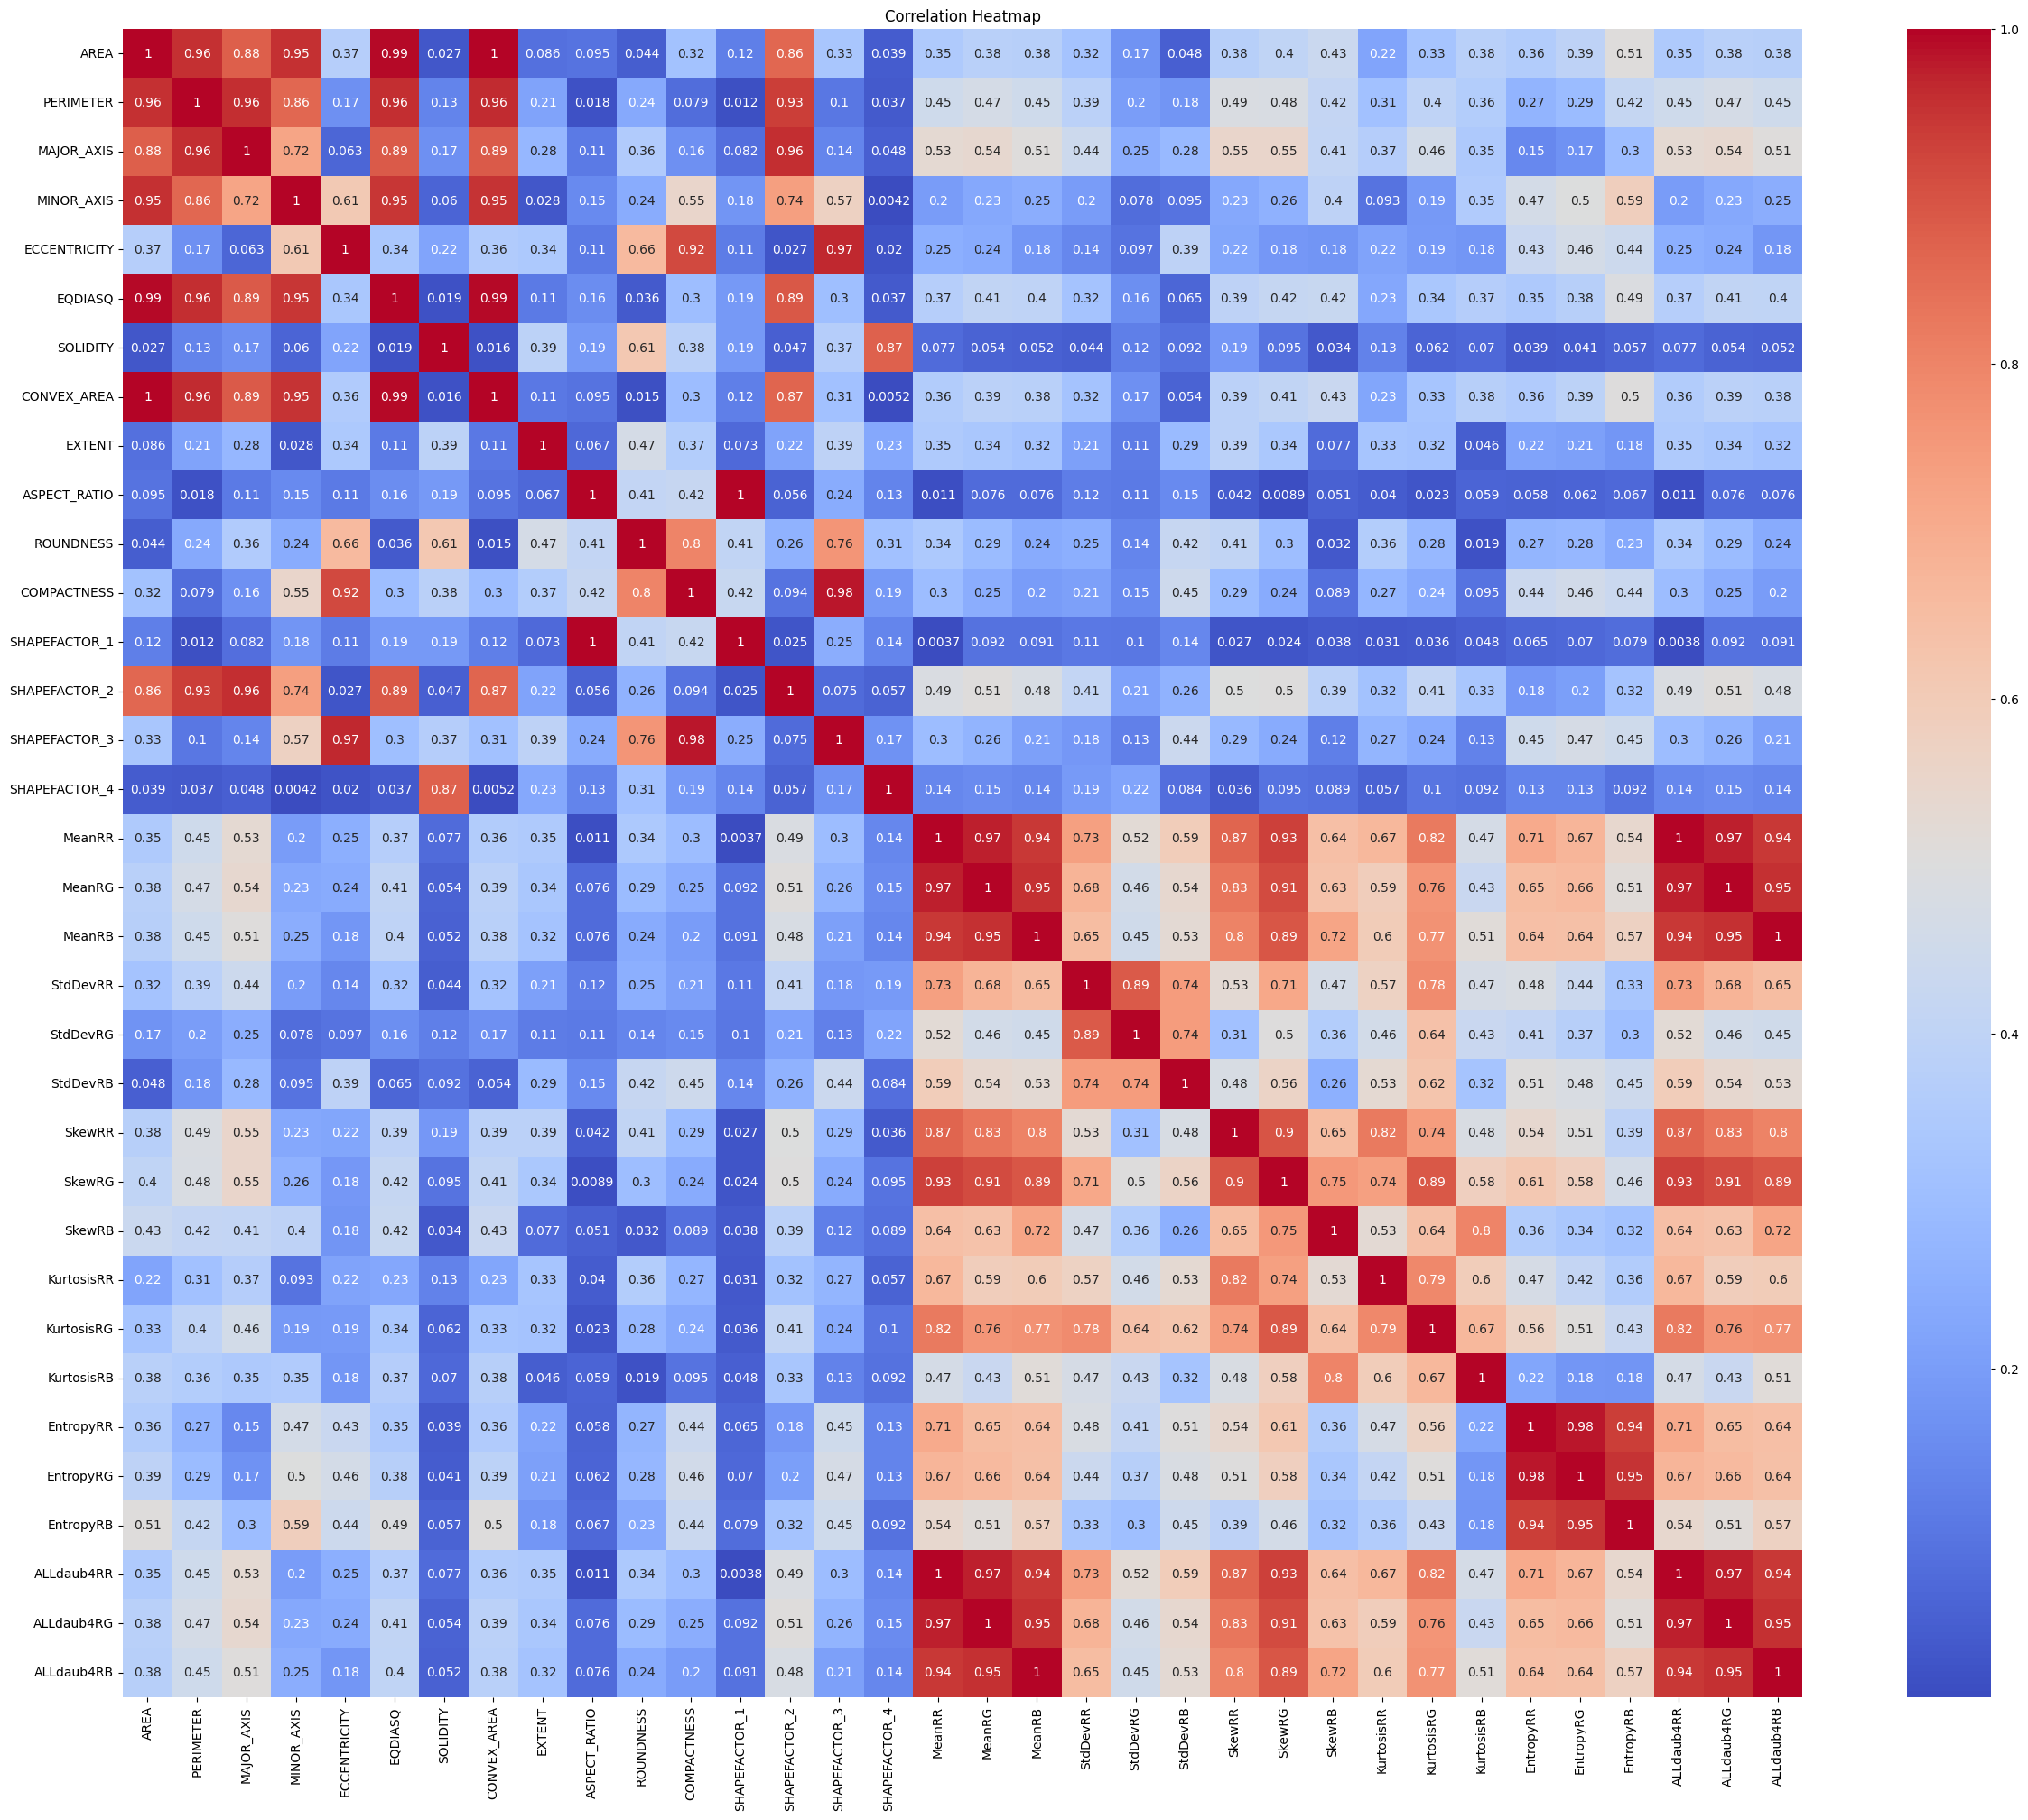

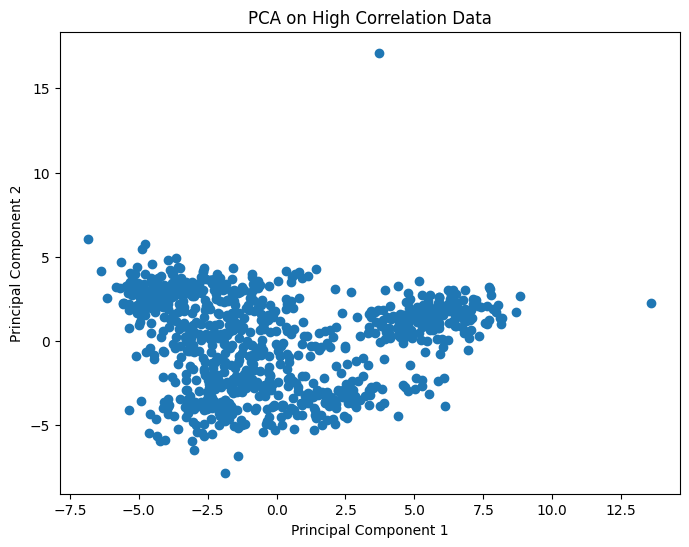

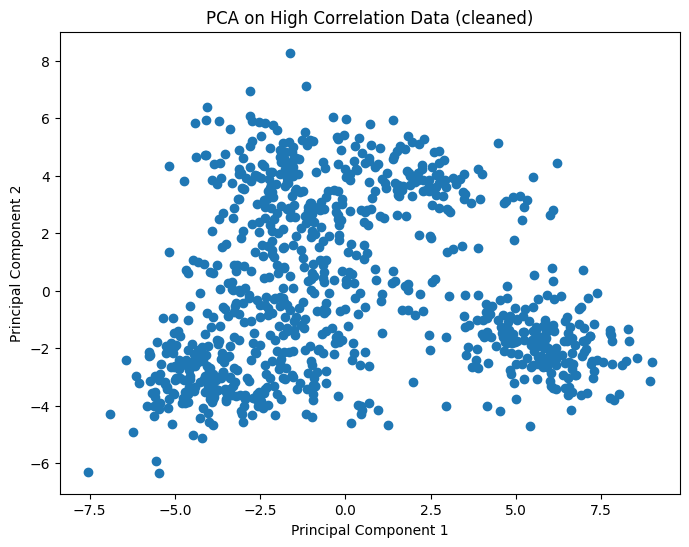

In [120]:
# TODO: Plotting features 

# plot correlation heatmap
plt.figure(figsize=(30,24))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# plot PCA to find outliers
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on High Correlation Data')
plt.show()

# plot PCA again with cleaned data
plt.figure(figsize=(8,6))
plt.scatter(pca_df2['PC1'], pca_df2['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on High Correlation Data (cleaned)')
plt.show()

In [121]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the task.
# The DataFrame should be in the df variable.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['CONVEX_AREA', 'EntropyRG', 'ROUNDNESS', 'ECCENTRICITY', 'StdDevRR',
       'MINOR_AXIS', 'SkewRR', 'SHAPEFACTOR_3', 'SkewRG', 'EntropyRB',
       'ALLdaub4RB', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'MeanRG',
       'SHAPEFACTOR_4', 'KurtosisRG', 'MeanRB', 'EntropyRR', 'StdDevRG',
       'MAJOR_AXIS', 'ALLdaub4RG', 'ASPECT_RATIO', 'StdDevRB', 'KurtosisRR',
       'MeanRR', 'EQDIASQ', 'ALLdaub4RR', 'KurtosisRB', 'AREA', 'PERIMETER',
       'COMPACTNESS', 'SOLIDITY', 'SkewRB', 'Class'],
      dtype='object')
First row by position: CONVEX_AREA      0.739435
EntropyRG        0.475924
ROUNDNESS        0.911998
ECCENTRICITY     0.523537
StdDevRR         0.379178
MINOR_AXIS       0.775624
SkewRR           0.234064
SHAPEFACTOR_3    0.668662
SkewRG           0.360305
EntropyRB        0.576571
ALLdaub4RB       0.524567
SHAPEFACTOR_1    0.075000
SHAPEFACTOR_2    0.096774
MeanRG           0.563040
SHAPEFACTOR_4    0.975690
KurtosisRG       0.075956
MeanRB           0.524539
EntropyRR  

## Assignment 5.2: Training and Testing Data (2 points)

Split the data into training and testing data using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of the `scikit-learn` library.
Put 25% of the data in training data.

1. Save the training data and its class variable to the variables `X_train`, `y_train`,
2. Save the test data to the variables `X_test`, `y_test`.

If you think there are unnecessary variables in the data, you should remove them at this stage.

Use the number `1550` as the random seed and the size of the test data 50%.

In [122]:
# TODO: Write your implementation in this cell.

from sklearn.model_selection import train_test_split

columns_to_drop = ['Class']
X = df.drop(columns=columns_to_drop)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=1550) # I tested different variations like 75/25 train/test etc.

In [123]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the task.

df_X_train = pd.DataFrame(X_train, columns=X.columns)

print(len(df))
print(len(X_train))
print(len(X_test))

df_X_train.head()

896
448
448


,CONVEX_AREA,EntropyRG,ROUNDNESS,ECCENTRICITY,StdDevRR,MINOR_AXIS,SkewRR,SHAPEFACTOR_3,SkewRG,EntropyRB,...,KurtosisRR,MeanRR,EQDIASQ,ALLdaub4RR,KurtosisRB,AREA,PERIMETER,COMPACTNESS,SOLIDITY,SkewRB
842,0.437239,0.680874,0.725629,0.799177,0.566342,0.439828,0.320627,0.324387,0.427741,0.672713,...,0.057524,0.740224,0.549397,0.740181,0.111501,0.425129,0.563306,0.370671,0.810323,0.340809
135,0.317862,0.820928,0.686370,0.877036,0.478272,0.299250,0.240228,0.250048,0.358190,0.832014,...,0.058191,0.624395,0.443783,0.624362,0.231730,0.319877,0.467846,0.291108,0.971393,0.180945
357,0.144706,0.654433,0.735554,0.758726,0.428332,0.181396,0.106714,0.420545,0.289134,0.760927,...,0.146266,0.982685,0.233465,0.982677,0.042608,0.143633,0.246157,0.470203,0.920398,0.277098
108,0.387446,0.793313,0.779885,0.792554,0.604094,0.399261,0.337665,0.373817,0.471361,0.683163,...,0.051727,0.609731,0.514035,0.609681,0.095051,0.388641,0.513787,0.422465,0.957711,0.192803
116,0.310875,0.607966,0.532422,0.773045,0.744221,0.353492,0.230709,0.252945,0.289311,0.695142,...,0.035098,0.842255,0.388087,0.842094,0.067625,0.268882,0.451456,0.294228,0.349502,0.160684


## Task 5.3: Implement Support Vector Machine Classification (2 points)

1. Use the `scikit-learn` library's *Linear Support Vector Classification* function to train a classifier with your training data that separates pulsars from other objects.

2. Create predictions for the data points of your test data in the `y_pred` variable.

3. Use the `metrics` module to make a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for the predictions of your test data. Save results to the `cr` variable.

4. Use the `metrics` module to make a **confusion matrix** and store it in the `cm` variable.

In [124]:
# TODO: Write your implementation in this cell.
# TODO: use LinearSVC.
cr = cm = None
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

classifier = LinearSVC(C=10)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# trying RFE to select most important features
from sklearn.feature_selection import RFE

rfe = RFE(classifier, n_features_to_select=27)
rfe.fit(X,y)
s_features = rfe.support_

# create the model again using features picked by RFE
X_2 = X.loc[:, s_features]
y_2 = df['Class']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y, test_size=0.25, random_state=1550)

classifier_2 = LinearSVC(C=10)

classifier_2.fit(X_train_2, y_train_2)
y_pred_2 = classifier_2.predict(X_test_2)

cr_2= classification_report(y_test_2, y_pred_2)
cm_2 = confusion_matrix(y_test_2, y_pred_2)


C:\Users\janne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear 

In [125]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the task.
# The results are in cm and cr variables.
print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')

print(f'Classification report:\n {cr_2}')
print(f'Confusion matrix:\n {cm_2}')

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       0.93      0.87      0.90        30
           2       0.99      0.99      0.99        82
           3       0.88      0.88      0.88        34
           4       0.80      0.67      0.73        49
           5       0.90      0.95      0.93       105
           6       0.86      0.88      0.87        48

    accuracy                           0.92       448
   macro avg       0.90      0.89      0.90       448
weighted avg       0.92      0.92      0.92       448

Confusion matrix:
 [[100   0   0   0   0   0   0]
 [  0  26   0   4   0   0   0]
 [  0   0  81   0   1   0   0]
 [  1   2   1  30   0   0   0]
 [  0   0   0   0  33  11   5]
 [  0   0   0   0   3 100   2]
 [  2   0   0   0   4   0  42]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
         

## Assignment 5.4: Comparison with another ML method and analysis of the results (2 points)

Verbally interpret the obtained test results.
* How well the support vector did in the classification task

For comparison, try teaching the model using another classification method:
* The method can be **RandomForest** (or if you want **DecisionTree** etc., but still justify your choice)
So you can freely select the ML classification method used in this comparison.

In [126]:
# TODO: Write your implementation in this cell.

# TODO: Implementation of another Machine Learning Classification method.
# TODO: The method can be RandomForest or any other method that works with this data "well enough".

# RandomForestClassifier from ensemble module
from sklearn.ensemble import RandomForestClassifier

rfc_cls = RandomForestClassifier(criterion='gini')
rfc_cls.fit(X_train, y_train)
y_pred = rfc_cls.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Classification report (RFC):', cr)
print('Confusion matrix (RFC):', cm)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_cls = DecisionTreeClassifier(max_depth=10, criterion='gini') # I'm little intimidated by increasing the max_depth anymore due to overfitting
dt_cls.fit(X_train, y_train)
y_pred_dt = dt_cls.predict(X_test)
cr_dt = classification_report(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print('Classification report (DT):', cr_dt)
print('Confusion matrix (DT):', cm_dt)

Classification report (RFC):               precision    recall  f1-score   support

           0       0.96      0.99      0.98       100
           1       0.96      0.77      0.85        30
           2       0.99      0.95      0.97        82
           3       0.79      0.88      0.83        34
           4       0.71      0.71      0.71        49
           5       0.92      0.93      0.93       105
           6       0.82      0.83      0.82        48

    accuracy                           0.90       448
   macro avg       0.88      0.87      0.87       448
weighted avg       0.90      0.90      0.90       448

Confusion matrix (RFC): [[99  0  0  0  0  0  1]
 [ 0 23  0  7  0  0  0]
 [ 0  0 78  1  1  0  2]
 [ 2  1  1 30  0  0  0]
 [ 0  0  0  0 35  8  6]
 [ 0  0  0  0  7 98  0]
 [ 2  0  0  0  6  0 40]]
Classification report (DT):               precision    recall  f1-score   support

           0       0.96      0.96      0.96       100
           1       0.67      0.60      0.63 

## Assignment 5.5: Analysis of the results (2 points)
Let's do comparison of Different Classification Models used in this assignment.
* Compare the classification results of SVM and Selected Classification models.
* Compare the obtained results and interpret the results verbally.
* Compare the **accuracy** and **confusion matrix** of the classification results for both methods.

In [127]:
# TODO: Compare the accuracy of the classification results of both classification methods.
# TODO: Compare the confusion matrix of both classification methods with each other.

## Linear SVC

I need to start this analysis with a little brief of what I did or tried to do.

Firstly, I preprocessed the data by scanning for NaN fields, which did not occur at all. Then I created a correlation matrix from the data
, plotted it and tried to find the most correlated features from the dataset to continue to modeling. As it turned out, 31 out of 35 columns were kept in the dataset with the most correlation. I used a threshold of 0.8 at start, but after modeling and little bit of try-and-error, the best threshold for correlacy was 0.6. I didn't keep track of the columns that were affected.

Next, I used the PCA method to find any outliers in the data and plotted them (plots are visible above). There were two outlying datapoints which, after a while of research, I removed from the dataset as it was only two rows in the 800+ total rows. The remaining data plotted quite nicely with the PCA method. The pattern was very clear and deterministic.

Next, the instructions on splitting the data into train and test was quite confusing, because first the TRAINING size was supposed to be 25% which is quite low percentage and test data was supposed to be 50%, so I was left thinking where does that extra 25% go? Well, I tested different variations from 25% test, 75% train to 50/50 and the results were quite similar.

### LinearSVC metrics:

The first metrics I got from the first run of LinearSVC model was something like 88% accuracy, with some classes predicted almost to 100% correctly. Class 4 performed the worst in every iteration. There are traces in the above code, where I try different method to find the most important features for re-modeling, like the RFE and coefficient-based drop-out, but the results were still quite similar. 

Altering the LSVC hyperparameter 'C', yielded the best results when increased to 'C=10'. That increased the overall performance of the model up to 91% and the Class 4 also increased roughly to 63% true-positives. Other hyperparametric alterations didn't give much performance boost whatsoever.

### RandomForestClassifier

The RFC performed with an overall performance of 90% out of the box. Still, similar result to LSVC with a distinct difference in performance when looking at Class 4. Class 4 predictability was 0.70, which in fact makes the RFC model quite better in overall.
I tuned some of the hyperparameters and the 'criterion="gini"' produced the best results increasing the overall accuracy of the model to 91%, no affection to Class 4 whatsoever.

### DecisionTree

This was primarily a joke as what I've heard and read, the DT is very prone to overfitting and the RFC already takes the decision trees into practice, but I still wanted to try. The overall performance of the model was the worst of the three. With some hyperparameter tuning, I was able to increase the accuracy of the model to 82% but it is still very lacking. Especially the Class 4 was problematic again.

Q: Are there other good classification methods to apply with this dataset or any other way to improve the classification results?

With some serious analysis of the features and their values and how they affect the predictions would probably increase the performance of any of these models. The other way I can think of would be tuning hyperparameters. I haven't had much experience with the classifiers so I just tried something, some worked, some didn't. But overall, I think the RFC could potentially perform even better with hyperparameter tuning and by choosing the very most important features.

On the other hand, my results were inline with the results the authors of this dataset got.